In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 5.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 5e-05, focal loss gamma 2


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.7094	Val Loss:	1.2060	Accuracy:	0.4454	F1:	0.3843
2 / 30: Train Loss:	0.6634	Val Loss:	0.7363	Accuracy:	0.7143	F1:	0.7135
3 / 30: Train Loss:	0.3706	Val Loss:	0.6442	Accuracy:	0.7227	F1:	0.7112
4 / 30: Train Loss:	0.2795	Val Loss:	0.6457	Accuracy:	0.7731	F1:	0.7662
5 / 30: Train Loss:	0.2121	Val Loss:	0.5521	Accuracy:	0.7731	F1:	0.7721
6 / 30: Train Loss:	0.1981	Val Loss:	0.6244	Accuracy:	0.7227	F1:	0.7290
7 / 30: Train Loss:	0.0754	Val Loss:	0.5864	Accuracy:	0.7479	F1:	0.7509
8 / 30: Train Loss:	0.0697	Val Loss:	0.7641	Accuracy:	0.7227	F1:	0.7274
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.67      0.82      0.74        38
oversimplification       0.86      0.69      0.77        36
slothful induction       0.82      0.80      0.81        45

          accuracy                           0.77       119
         macro avg       0.78     

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3439	Val Loss:	0.9926	Accuracy:	0.5042	F1:	0.4386
2 / 30: Train Loss:	0.2481	Val Loss:	0.7454	Accuracy:	0.7563	F1:	0.7549
3 / 30: Train Loss:	0.1646	Val Loss:	0.6710	Accuracy:	0.7815	F1:	0.7734
4 / 30: Train Loss:	0.1081	Val Loss:	0.7452	Accuracy:	0.7143	F1:	0.7136
5 / 30: Train Loss:	0.1224	Val Loss:	0.6371	Accuracy:	0.7647	F1:	0.7646
6 / 30: Train Loss:	0.0819	Val Loss:	0.6081	Accuracy:	0.7479	F1:	0.7490
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.83      0.66      0.74        38
oversimplification       0.96      0.64      0.77        36
slothful induction       0.69      1.00      0.82        45

          accuracy                           0.78       119
         macro avg       0.83      0.77      0.77       119
      weighted avg       0.82      0.78      0.78       119

test results:
                    precision    recall  f1

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0827	Val Loss:	1.0839	Accuracy:	0.4286	F1:	0.3528
2 / 30: Train Loss:	0.0628	Val Loss:	0.9572	Accuracy:	0.6303	F1:	0.6381
3 / 30: Train Loss:	0.0500	Val Loss:	0.8412	Accuracy:	0.6555	F1:	0.6577
4 / 30: Train Loss:	0.0646	Val Loss:	1.0917	Accuracy:	0.3782	F1:	0.1829
5 / 30: Train Loss:	0.0762	Val Loss:	1.0957	Accuracy:	0.3782	F1:	0.2586
6 / 30: Train Loss:	0.0669	Val Loss:	1.0883	Accuracy:	0.3782	F1:	0.2727
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.49      0.97      0.65        38
oversimplification       0.96      0.67      0.79        36
slothful induction       0.89      0.38      0.53        45

          accuracy                           0.66       119
         macro avg       0.78      0.67      0.66       119
      weighted avg       0.79      0.66      0.65       119

test results:
                    precision    recall  f1

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0099	Val Loss:	1.1042	Accuracy:	0.3025	F1:	0.1548
2 / 30: Train Loss:	0.0047	Val Loss:	1.0988	Accuracy:	0.3193	F1:	0.1614
3 / 30: Train Loss:	0.0036	Val Loss:	1.0995	Accuracy:	0.3025	F1:	0.1548
4 / 30: Train Loss:	0.0032	Val Loss:	1.0987	Accuracy:	0.3025	F1:	0.1548
5 / 30: Train Loss:	0.0035	Val Loss:	1.0996	Accuracy:	0.3193	F1:	0.1614
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.32      1.00      0.48        38
oversimplification       0.00      0.00      0.00        36
slothful induction       0.00      0.00      0.00        45

          accuracy                           0.32       119
         macro avg       0.11      0.33      0.16       119
      weighted avg       0.10      0.32      0.15       119

test results:
                    precision    recall  f1-score   support

 misrepresentation       0.33      1.00      0.49     

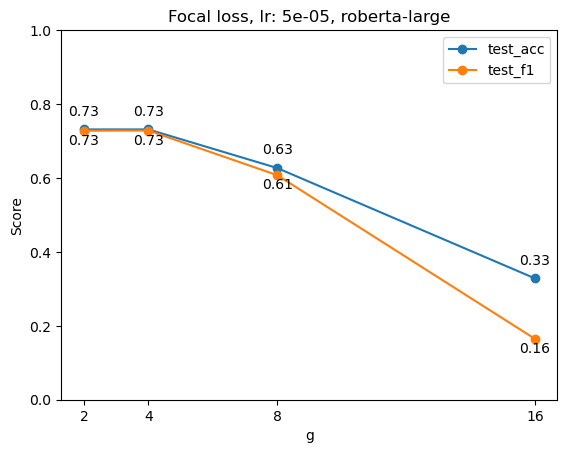

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f